<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [214]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [215]:
google_play = pd.read_csv("googleplaystore.csv")

## EDA

In [216]:
google_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [217]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [218]:
google_play.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [219]:
type(google_play)

pandas.core.frame.DataFrame

## Data Preprocessing

In [220]:
# Convert all ratings to 0-5 scale (replace other values with NaN)
google_play["Rating"] = [
    i if i >= 0 and i <= 5 else np.nan for i in google_play["Rating"]
]

#Convert all reviews to float (convert M to 1000000)
for i in range(len(google_play["Reviews"])):
    if str(google_play["Reviews"][i]).find("M") > -1:
        google_play["Reviews"][i] = float(google_play["Reviews"][i].replace("M", "")) * 1000000 #Convert to million
    else:
        google_play["Reviews"][i] = float(google_play["Reviews"][i])

# Remove unwanted values from sizes
google_play["Size"] = (
    google_play["Size"]
    .astype(str).replace("[Varies with device | Varieswithdevice]", np.nan, regex=True)
    .replace("[,+]", "", regex=True)
)

# Conver all sizes to megabytes (remove "M" and "k" and convert to float)
for i in range(len(google_play["Size"])):
    if str(google_play["Size"][i]).find("k") > -1:
        google_play["Size"][i] = float(google_play["Size"][i].replace("k", "")) / 1000 # Convert to megabytes
    if str(google_play["Size"][i]).find("M") > -1:
        google_play["Size"][i] = float(google_play["Size"][i].replace("M", "")) # It's already in megabytes

google_play["Size"] = google_play["Size"].astype(float)

# Remove unwanted values from installs, remove "," , "+" and "Free"
google_play["Installs"] = (
    google_play["Installs"]
    .astype(str).replace("[,+]", "", regex=True)
    .replace("Free", np.nan)
    .astype(float)
)

# Change type 0 to NAN
google_play["Type"] = google_play["Type"].replace("0", np.nan)

# Remove $ sign and unwanted characters from the prices
google_play["Price"] = google_play["Price"].astype(str).replace("[$]", "",regex=True).replace("[A-Za-z]", np.nan, regex=True).astype(float)

# Create 3 new columns to seperate each part of the last update dates
years = []
months = []
days = []
for i in range(len(google_play["Last Updated"])):
    date = pd.to_datetime(google_play["Last Updated"][i],errors='coerce')
    years.append(date.year)
    months.append(date.month)
    days.append(date.day)
 
google_play = google_play.drop(["Last Updated"], axis=1)
google_play["Last Updated Year"] = years
google_play["Last Updated Month"] = months
google_play["Last Updated Day"] = days

# Remove unwanted values from Andriod Ver and convert all values to float (The format is *.*)
google_play["Android Ver"] = (
    google_play["Android Ver"]
    .replace("and up", "", regex=True)
    .replace("Varies with device", np.nan)
)

# This formation is done only for better demonstration of data (it's not necessary)
google_play["Android Ver"] = list(
    map(lambda x: x if str(x) == "nan" else str(x)[0:3], google_play["Android Ver"]) # Only get the first 3 digits (to convert numbers to *.* format)
)

## Strorytelling - Visualization

[Text(0, 0, 'Free'), Text(1, 0, 'Paid')]

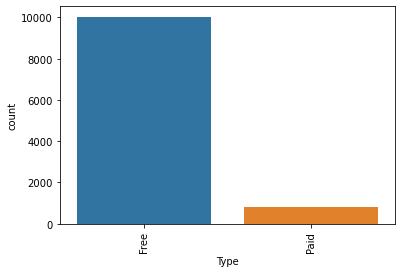

In [221]:
# Count of each type
types_countplot = sns.countplot(x="Type", data=google_play)
types_countplot.set_xticklabels(types_countplot.get_xticklabels(),rotation=90)

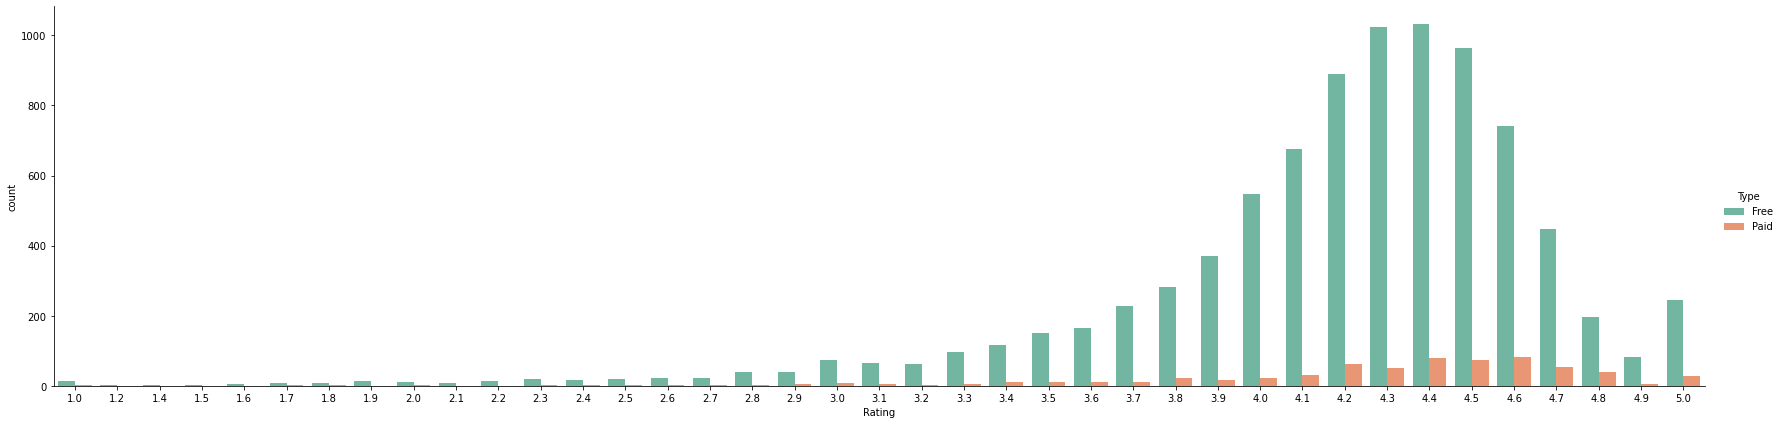

In [222]:
# Count of each rating separated by type
rating_type_catplot = sns.catplot(x="Rating",hue='Type', kind="count",palette=sns.color_palette("Set2"), data=google_play, height=6, aspect=4)

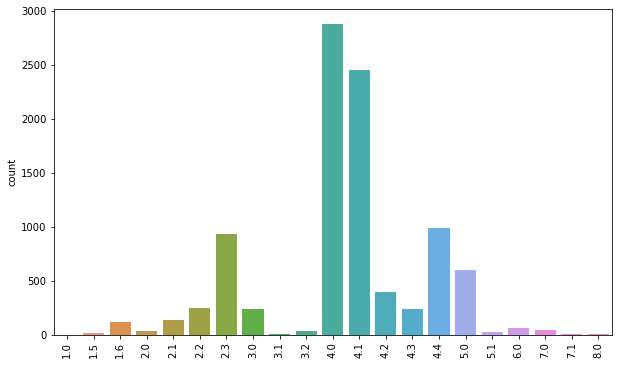

In [223]:
# Count of each andriod version
andriodVers_countplot = sns.countplot(x = sorted(google_play["Android Ver"].dropna().values))
andriodVers_countplot.set_xticklabels(andriodVers_countplot.get_xticklabels(),rotation=90)
andriodVers_countplot.figure.set_size_inches(10,6)

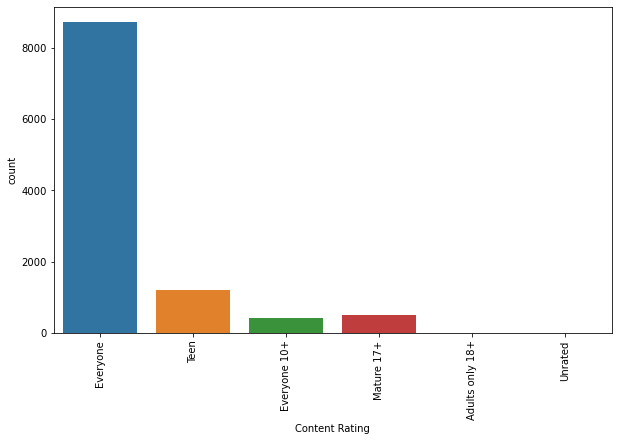

In [224]:
# Count of each content rating
contentRating_countplot = sns.countplot(x="Content Rating",data=google_play)
contentRating_countplot.set_xticklabels(contentRating_countplot.get_xticklabels(),rotation=90)
contentRating_countplot.figure.set_size_inches(10,6)

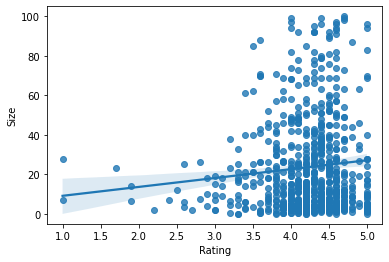

In [225]:
# Relativity of rating and size
random_sample = google_play.sample(n=1000)
rating_size_plot = sns.regplot(x="Rating", y="Size", data=random_sample)

<AxesSubplot:ylabel='Category'>

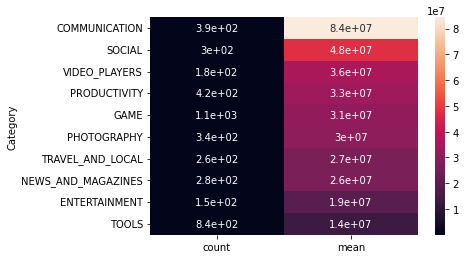

In [226]:
# Top ten most popular cateogires based on the number of installs
result = google_play.groupby("Category")["Installs"].agg(["count","mean"]).sort_values(by="mean", ascending=False).head(10)
sns.heatmap(result, annot=True)

<AxesSubplot:ylabel='Genres'>

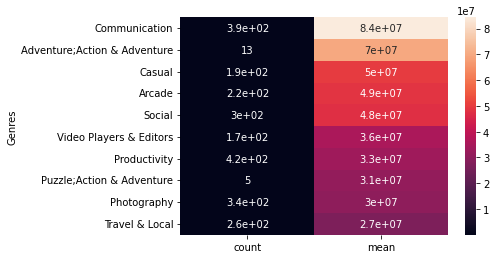

In [227]:
# Top ten most popular genres based on the number of installs
result = google_play.groupby("Genres")["Installs"].agg(["count","mean"]).sort_values(by="mean", ascending=False).head(10)
sns.heatmap(result, annot=True)

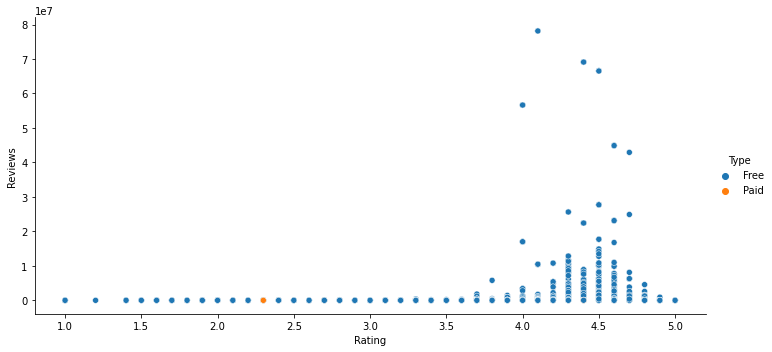

In [228]:
# Relativity of rating and reviews
sns.relplot(x="Rating", y="Reviews", hue="Type", data=google_play,height=5, aspect=2)

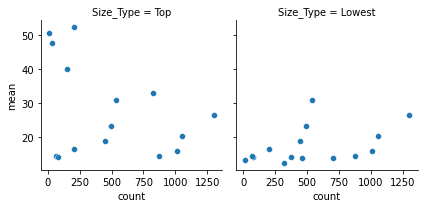

In [229]:
# Top largest and smalles (by size) installed apps (Relativity between mean size and count of installs)
top = google_play.groupby("Installs")["Size"].agg(["count","mean"]).sort_values(by="mean", ascending=False).head(15)
lowest = google_play.groupby("Installs")["Size"].agg(["count","mean"]).sort_values(by="mean", ascending=True).head(15)
top["Size_Type"] = "Top"
lowest["Size_Type"] = "Lowest"
result = pd.concat([top, lowest])

g = sns.FacetGrid(result, col="Size_Type")
g.map(sns.scatterplot, "count","mean")

<AxesSubplot:xlabel='Last Updated Year', ylabel='Rating'>

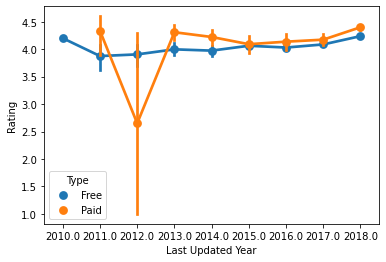

In [230]:
# Relativity between Last update date and rating filtered by type
sns.pointplot(x="Last Updated Year", y="Rating",hue="Type", data=google_play, height=5, aspect=2)

In [231]:
# Top 10 apps by rating
google_play.sort_values(by="Rating", ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated Year,Last Updated Month,Last Updated Day
9056,Santa's Monster Shootout DX,GAME,5.0,4.0,33.0,50.0,Paid,1.99,Teen,Action,1.05,2.2,2013.0,8.0,15.0
8395,DG TV,NEWS_AND_MAGAZINES,5.0,3.0,5.7,100.0,Free,0.00,Everyone,News & Magazines,1.2,4.1,2018.0,5.0,26.0
8493,PK and DK Audio App,FAMILY,5.0,2.0,3.9,100.0,Free,0.00,Everyone,Entertainment,5.1.4,4.1,2017.0,10.0,25.0
6330,HON. B.J. ACS COLLEGE ALE,FAMILY,5.0,3.0,1.8,100.0,Free,0.00,Mature 17+,Education,3.1,4.3,2016.0,12.0,26.0
6342,BJ Foods,BUSINESS,5.0,3.0,1.5,10.0,Free,0.00,Everyone,Business,2.7,4.1,2018.0,2.0,7.0
6363,Read it easy for BK,LIFESTYLE,5.0,1.0,3.2,50.0,Free,0.00,Everyone,Lifestyle,1.2,4.1,2018.0,7.0,15.0
9766,ER Assist,PRODUCTIVITY,5.0,3.0,28.0,10.0,Free,0.00,Everyone,Productivity,0.1.7,4.1,2016.0,12.0,6.0
6364,BK Video Status,FAMILY,5.0,13.0,2.1,100.0,Free,0.00,Everyone,Entertainment,2.3,4.4,2018.0,7.0,7.0
6372,BK Formula Calculator,TOOLS,5.0,6.0,11.0,100.0,Free,0.00,Everyone,Tools,0.1.1,4.2,2015.0,8.0,8.0
6375,Dr Bk Sachin bhai,LIFESTYLE,5.0,19.0,3.1,1000.0,Free,0.00,Everyone,Lifestyle,2.2,4.1,2017.0,12.0,7.0


In [232]:
# Top 10 most expensive apps
google_play.sort_values(by="Price", ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated Year,Last Updated Month,Last Updated Day
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300,10000.0,Paid,400.00,Everyone,Lifestyle,1.0.1,4.1,2018.0,5.0,3.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.800,100000.0,Paid,399.99,Everyone,Lifestyle,2,4.0,2018.0,1.0,12.0
5358,I am Rich!,FINANCE,3.8,93.0,22.000,1000.0,Paid,399.99,Everyone,Finance,1,4.1,2017.0,12.0,11.0
4197,most expensive app (H),FAMILY,4.3,6.0,1.500,100.0,Paid,399.99,Everyone,Entertainment,1,7.0,2018.0,7.0,16.0
5369,I am Rich,FINANCE,4.3,180.0,3.800,5000.0,Paid,399.99,Everyone,Finance,1,4.2,2018.0,3.0,22.0
5359,I am rich(premium),FINANCE,3.5,472.0,0.965,5000.0,Paid,399.99,Everyone,Finance,3.4,4.4,2017.0,5.0,1.0
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000,1000.0,Paid,399.99,Everyone,Finance,1.0.2,4.1,2018.0,6.0,25.0
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0.0,40.000,0.0,Paid,399.99,Everyone,Lifestyle,MONEY,4.1,2017.0,12.0,1.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.700,50000.0,Paid,399.99,Everyone,Finance,1.6,4.0,2017.0,11.0,12.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000,10000.0,Paid,399.99,Everyone,Lifestyle,1.0.0,4.4,2018.0,3.0,11.0


In [233]:
# Top 10 genres by rating mean
google_play.groupby("Genres").agg({"Rating": "mean"}).sort_values(by="Rating", ascending=False).head(10)

,Rating
Genres,
Comics;Creativity,4.800000
Board;Pretend Play,4.800000
Health & Fitness;Education,4.700000
Adventure;Brain Games,4.600000
Strategy;Action & Adventure,4.600000
Puzzle;Education,4.600000
Entertainment;Creativity,4.533333
Music;Music & Video,4.533333
Arcade;Pretend Play,4.500000


In [234]:
# Top 10 free apps with more than 1000 installs
top_install_free_apps = google_play.query("Type == 'Free' and Installs > 1000")
top_install_free_apps.sort_values(by="Installs", ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated Year,Last Updated Month,Last Updated Day
2853,Google Photos,PHOTOGRAPHY,4.5,10858538.0,NaN,1.000000e+09,Free,0.0,Everyone,Photography,Varies with device,NaN,2018.0,8.0,6.0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,Varies with device,NaN,2018.0,8.0,1.0
3928,YouTube,VIDEO_PLAYERS,4.3,25623548.0,NaN,1.000000e+09,Free,0.0,Teen,Video Players & Editors,Varies with device,NaN,2018.0,8.0,2.0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,Varies with device,NaN,2018.0,8.0,1.0
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,NaN,1.000000e+09,Free,0.0,Teen,Entertainment,Varies with device,NaN,2018.0,7.0,16.0
340,Gmail,COMMUNICATION,4.3,4604324.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,Varies with device,NaN,2018.0,8.0,2.0
341,Hangouts,COMMUNICATION,4.0,3419249.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,Varies with device,NaN,2018.0,7.0,21.0
2611,Instagram,SOCIAL,4.5,66577313.0,NaN,1.000000e+09,Free,0.0,Teen,Social,Varies with device,NaN,2018.0,7.0,31.0
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,Varies with device,NaN,2018.0,7.0,31.0
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1.000000e+09,Free,0.0,Teen,Social,Varies with device,NaN,2018.0,8.0,3.0


In [235]:
# Top apps with more than 1M reviews and more than 4 rating
google_play.query("Reviews > 1000000 and Rating > 4")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated Year,Last Updated Month,Last Updated Day
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,NaN,100000000.0,Free,0.0,Teen,Books & Reference,Varies with device,NaN,2018.0,8.0,1.0
189,Uber Driver,BUSINESS,4.4,1254730.0,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,NaN,2018.0,8.0,3.0
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861.0,35.0,100000000.0,Free,0.0,Everyone,Business,9.7.14188,4.1,2018.0,8.0,2.0
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859.0,35.0,100000000.0,Free,0.0,Everyone,Business,9.7.14188,4.1,2018.0,8.0,2.0
297,LINE WEBTOON - Free Comics,COMICS,4.5,1013635.0,NaN,10000000.0,Free,0.0,Teen,Comics,Varies with device,NaN,2018.0,7.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Farm Heroes Saga,FAMILY,4.4,7615646.0,71.0,100000000.0,Free,0.0,Everyone,Casual,5.2.6,2.3,2018.0,8.0,7.0
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25.0,10000000.0,Free,0.0,Teen,Simulation,1.13.12,4.1,2018.0,6.0,11.0
10327,Garena Free Fire,GAME,4.5,5534114.0,53.0,100000000.0,Free,0.0,Teen,Action,1.21.0,4.0,2018.0,8.0,3.0
10636,FRONTLINE COMMANDO,GAME,4.4,1351833.0,12.0,10000000.0,Free,0.0,Teen,Action,3.0.3,2.1,2013.0,10.0,28.0


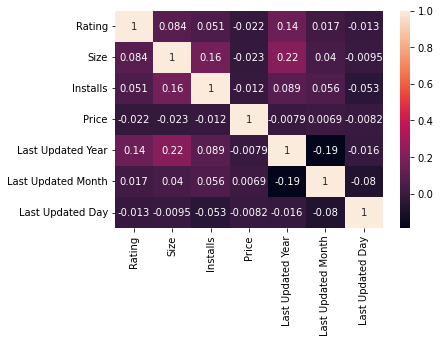

In [236]:
my_correlation = google_play.corr()
heatmapcorr = sns.heatmap(my_correlation, annot=True)

## Send us the Result (Maktabkhoone)